# Topic Modelling 
modified with 
*  https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html
* https://towardsdatascience.com/6-tips-to-optimize-an-nlp-topic-model-for-interpretability-20742f3047e2

In [1]:
#visualisation 
!pip install pyldavis --q

     |████████████████████████████████| 1.7 MB 13.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... canceled
ERROR: Operation cancelled by user


In [2]:
pip install stanza

     |████████████████████████████████| 342 kB 12.5 MB/s 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 385, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.7/dist-pack

## Import Modules




In [ ]:
from pprint import pprint 

#logging 
import logging 
logging.basicConfig(format = '%(asctime)s: %(levelname)s : %(message)s',level= logging.INFO)

In [ ]:
#pre-process data
import pandas as pd
import numpy as np

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
from gensim.parsing.preprocessing import strip_numeric,strip_multiple_whitespaces, strip_punctuation, strip_short, strip_tags

2021-08-11 17:56:40,655: INFO : 'pattern' package not found; tag filters are not available for English


In [ ]:
#form ngrams
from gensim.models import Phrases
from gensim.corpora import Dictionary 
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#LDA Model
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

#tfidf model 
from gensim.models import TfidfModel

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

2021-08-11 17:56:40,928: INFO : Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt
2021-08-11 17:56:40,958: INFO : Generating grammar tables from /usr/lib/python3.7/lib2to3/PatternGrammar.txt
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/p

In [ ]:
import stanza
stanza.download('en',package = 'craft')

2021-08-11 17:56:45,676: INFO : Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | craft   |
| pos       | craft   |
| lemma     | craft   |
| depparse  | craft   |
| pretrain  | craft   |



2021-08-11 17:57:21,217: INFO : Finished downloading models and saved to /root/stanza_resources.


### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/bbc_1807_1906_novideos.csv',encoding = 'utf-8')
df.head()

,Month,link,text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1901,https://www.bbc.co.uk/news/health-46638419,My name is Tim and I'm a cheese addict. But wh...,NaN,NaN,NaN,NaN
1,1901,https://www.bbc.co.uk/news/health-46720303,Children in the UK exceed the maximum recommen...,NaN,NaN,NaN,NaN
2,1901,https://www.bbc.co.uk/news/health-46746552,A clinical trial has been launched to see if a...,NaN,NaN,NaN,NaN
3,1901,https://www.bbc.co.uk/news/health-46739905,When 12-year-old Matthew Carter saw how much s...,NaN,NaN,NaN,NaN
4,1901,https://www.bbc.co.uk/news/stories-46427960,When Jessica Share bought sperm from a sperm b...,NaN,NaN,NaN,NaN


In [ ]:
texts = list(df.loc[:, "text"].values)
texts[0]

'My name is Tim and I\'m a cheese addict. But what I\'ve been discovering recently has shaken me to the core. I can barely look a Babybel in the face. A half-eaten halloumi squeaklessly lies yellowing in the fridge. My cheese dreams are shattering. For, after a lifetime of unfettered devotion, could it possibly be that cheese is more foe than friend? That I am addicted to something that is not so good for my body? That cheese should be toast? These are questions that began surfacing a couple of months ago when I began making an episode for my new podcast for the BBC, All Hail Kale, looking into whether dairy was scary.  For some time, I\'d increasingly been questioning the logic of adults drinking milk.  While milk and dairy products, such as cheese and yoghurt, are good sources of protein and calcium and can form part of a healthy, balanced diet, as Dr Michael Greger, from NutritionFacts.org, put it to me: "There\'s no animal on the planet that drinks milk after weaning - and then to 

### Pre-process, tokenise, and lemmatisation

In [ ]:
new_sw = ['people','say','says','said','could','one','would','take','want','have','she','he','give','told','know','but','health','month','day','year', 'minute','second','hundred','thousand','however']
stop_words = STOPWORDS.union(set(new_sw))

In [ ]:
pubmed_stoplist = ['a','about','again','all','almost', 'also','although','always',\
                   'among','an','and','another','any','are','as','at','be','because',\
                   'been','before','being','between','both','but','by','can','could',\
                   'did','do','does','done','due','during','each','either','enough', \
                   'especially','etc','for','found', 'from','further','had','is','it',\
                   'has','have','having','here','how','however','i','if','in','into',\
                   'its','itself','just','kg','km', 'made','mainly','make','may','mg',\
                   'might','ml','mm','most','mostly','must','nearly','neither','no',\
                   'nor','obtained','of','often','on','our','overall','perhaps','pmid',\
                   'quite','rather','really','regarding','seem','seen','several',\
                   'should','show','showed','shown','shows','significantly','since',\
                   'so','some','such','than','that','the','their','theirs','them',\
                   'then','there','therefore','these','they','this','those','through',\
                   'thus','to','upon','use','used','using','various','very', 'was','we',\
                   'were','what','when', 'which','while','with','within','without','would']

In [ ]:
stop_words = STOPWORDS.union(set(pubmed_stoplist))

In [ ]:
clean_article = []

for text in texts:
  #remove new line character and punctuations 
  clean = []
  text = strip_multiple_whitespaces(text)
  text = strip_numeric(text)
  text = strip_punctuation(text)
  text = strip_tags(text)
  text = strip_short(text,minsize=3)
  text = remove_stopwords(text)
  # lower case, de-accents.  Convert the texts into a list of tokens
  for token in gensim.utils.simple_preprocess(text, deacc=True):
      clean.append(token)
  clean_article.append(clean)

In [ ]:
print(clean_article)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
nlp_craft = stanza.Pipeline('en',package = 'craft',processor = 'pos,tokenize,lemma',tokenize_pretokenized = True)

2021-08-11 17:59:11,920: INFO : Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | craft   |
| pos       | craft   |
| lemma     | craft   |
| depparse  | craft   |

2021-08-11 17:59:12,053: INFO : Use device: cpu
2021-08-11 17:59:12,056: INFO : Loading: tokenize
2021-08-11 17:59:12,059: INFO : Loading: pos
2021-08-11 17:59:12,563: INFO : Loading: lemma
2021-08-11 17:59:12,682: INFO : Loading: depparse
2021-08-11 17:59:13,140: INFO : Done loading processors!


In [ ]:
doc_craft = nlp_craft (clean_article)
#15 mins with no GPU
#17 mins with GPU

In [ ]:
print(f"Num sentences:\t{len(doc_craft.sentences)}")
print(f"Num tokens:\t{doc_craft.num_tokens}")
print(f"Num words:\t{doc_craft.num_words}")
print(f"Num entities:\t{len(doc_craft.entities)}")

Num sentences:	712
Num tokens:	228519
Num words:	228519
Num entities:	0


In [ ]:
print (doc_craft.sentences[0])

[
  {
    "id": 1,
    "text": "tim",
    "lemma": "the",
    "upos": "DET",
    "xpos": "DT",
    "head": 3,
    "deprel": "det",
    "misc": "",
    "start_char": 0,
    "end_char": 3
  },
  {
    "id": 2,
    "text": "cheese",
    "lemma": "cheese",
    "upos": "NOUN",
    "xpos": "NN",
    "head": 3,
    "deprel": "compound",
    "misc": "",
    "start_char": 4,
    "end_char": 10
  },
  {
    "id": 3,
    "text": "addict",
    "lemma": "addict",
    "upos": "NOUN",
    "xpos": "NN",
    "head": 10,
    "deprel": "nsubj",
    "misc": "",
    "start_char": 11,
    "end_char": 17
  },
  {
    "id": 4,
    "text": "but",
    "lemma": "but",
    "upos": "CCONJ",
    "xpos": "CC",
    "head": 5,
    "deprel": "cc",
    "misc": "",
    "start_char": 18,
    "end_char": 21
  },
  {
    "id": 5,
    "text": "discovering",
    "lemma": "discover",
    "upos": "VERB",
    "xpos": "VBG",
    "head": 10,
    "deprel": "conj",
    "misc": "",
    "start_char": 22,
    "end_char": 33
  },
  {
  

In [ ]:
print(doc_craft.sentences[0].words[0].upos)

DET


In [ ]:
type(doc_craft)

stanza.models.common.doc.Document

In [ ]:
dicts = doc_craft.to_dict()

In [ ]:
import csv
  
with open('doc_craft_dic.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerow(dicts)

In [ ]:
import pandas as pd
doc_craft_dict = pd.DataFrame(dicts)
doc_craft_dict.to_csv('doc_crat_pddict.csv') 

In [ ]:
noun_list = []
for i in range(len(doc_craft.sentences)):
  article_noun_list = []
  for m in range(len(doc_craft.sentences[i].tokens)):
    if doc_craft.sentences[i].words[m].upos == "NOUN" or "PROPN":
      article_noun_list.append(doc_craft.sentences[i].words[m].lemma)
  noun_list.append(article_noun_list)


In [ ]:
print(noun_list)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(len(noun_list[0]))

434


In [ ]:
stop_word = ['the','but','for','time','from']

In [ ]:
for i in range(len(noun_list)):
  for word in noun_list[i]:
    if word in stop_word:
      noun_list[i].remove(word)

In [ ]:
print(len(noun_list[0]))

424


## bigram 

In [ ]:
bigram = gensim.models.Phrases(noun_list, min_count=5, threshold=100) 
bigram_2 = gensim.models.phrases.Phraser(bigram)
bigram_words = [bigram_2[text] for text in noun_list]

2021-08-11 18:28:10,917: INFO : collecting all words and their counts
2021-08-11 18:28:10,919: INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2021-08-11 18:28:11,400: INFO : collected 165393 word types from a corpus of 223110 words (unigram + bigrams) and 712 sentences
2021-08-11 18:28:11,402: INFO : using 165393 counts as vocab in Phrases<0 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2021-08-11 18:28:11,404: INFO : source_vocab length 165393
2021-08-11 18:28:13,113: INFO : Phraser built with 447 phrasegrams


In [ ]:
print(bigram_words[0])

['cheese', 'addict', 'discover', 'recently', 'shake', 'core', 'barely', 'look', 'babybel', 'face', 'half', 'eat', 'halloumi', 'squeaklessly', 'lie', 'yellow', 'fridge', 'cheese', 'dream', 'shatter', 'lifetime', 'unfettered', 'devotion', 'possibly', 'cheese', 'foe', 'friend', 'that', 'addict', 'good', 'body', 'that', 'cheese', 'toast', 'these', 'question', 'begin', 'surface', 'couple', 'month', 'ago', 'begin', 'make', 'episode', 'new', 'podcast', 'bbc', 'all', 'hail', 'kale', 'look', 'dairy', 'scary', 'increasingly', 'question', 'logic', 'adult', 'drink', 'milk', 'while', 'milk', 'dairy', 'product', 'cheese', 'yoghurt', 'good', 'source', 'protein', 'calcium', 'form', 'healthy', 'balance', 'diet', 'michael', 'greger', 'nutritionfact', 'org', 'there', 'animal', 'planet', 'drink', 'milk', 'weaning', 'drink', 'milk', 'species', 'sense', 'reel', 'series', 'study', 'show', 'life', 'shortening', 'potential', 'drink', 'hormonal', 'stew', 'blithely', 'assume', 'cheese', 'mature', 'benign', 'bene

In [ ]:
for word in bigram_words[0]:
  if '_' in word:
    print(word)

mediterranean_diet
vitamin_mineral


Remove common and rare words

In [ ]:
dictionary = Dictionary (bigram_words)

2021-08-11 18:28:20,709: INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-08-11 18:28:20,930: INFO : built Dictionary(14345 unique tokens: ['able', 'abood', 'absorb', 'accord', 'actual']...) from 712 documents (total 217531 corpus positions)


In [ ]:
dictionary.filter_extremes(no_below=5, no_above=0.7)

2021-08-11 18:28:21,308: INFO : discarding 10085 tokens: [('abood', 1), ('babybel', 1), ('benign', 3), ('bewilder', 2), ('blithely', 1), ('brie', 1), ('butterfat', 1), ('confess', 4), ('controversially', 3), ('core', 4)]...
2021-08-11 18:28:21,310: INFO : keeping 4260 tokens which were in no less than 5 and no more than 498 (=70.0%) documents
2021-08-11 18:28:21,321: INFO : resulting dictionary: Dictionary(4260 unique tokens: ['able', 'absorb', 'accord', 'actual', 'addict']...)


Build bag of words 

In [ ]:
# vectorizer = TfidfVectorizer(lowercase=False, ngram_range = (1,3))
# vector = [vectorizer.fit_transform(text) for text in lemmatized_list]

In [ ]:
# idf = vectorizer.idf_
# dic = dict(zip(vectorizer.get_feature_names(), idf))
# pprint(dic)

In [ ]:
corpus = [dictionary.doc2bow(text) for text in bigram_words]

In [ ]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 4260
Number of documents: 712


In [ ]:
# df = pd.DataFrame(vector[0].T.todense(),index = vectorizer.get_feature_names(),columns=['tfidf'])
# df.sort_values(by['tfidf'],ascending = False)

In [ ]:
# Human readable format of corpus (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('able', 1),
  ('absorb', 1),
  ('accord', 1),
  ('actual', 1),
  ('addict', 2),
  ('addiction', 1),
  ('addictive', 1),
  ('adult', 2),
  ('ago', 1),
  ('agree', 1),
  ('all', 3),
  ('and', 1),
  ('animal', 1),
  ('answer', 1),
  ('apparently', 2),
  ('assume', 1),
  ('away', 2),
  ('bacterium', 1),
  ('balance', 1),
  ('barely', 1),
  ('bbc', 2),
  ('begin', 2),
  ('beneficial', 1),
  ('body', 1),
  ('bother', 1),
  ('bread', 1),
  ('break', 2),
  ('calcium', 1),
  ('carry', 1),
  ('centre', 1),
  ('certainly', 1),
  ('change', 1),
  ('cheese', 21),
  ('chemical', 1),
  ('childhood', 1),
  ('combination', 1),
  ('concentrate', 1),
  ('confirm', 1),
  ('consensus', 2),
  ('consider', 1),
  ('consume', 1),
  ('contact', 1),
  ('contain', 1),
  ('couple', 1),
  ('crack', 1),
  ('daily', 1),
  ('dairy', 10),
  ('damage', 1),
  ('david', 1),
  ('day', 3),
  ('decide', 1),
  ('definitive', 1),
  ('denial', 1),
  ('diagnosis', 1),
  ('diet', 2),
  ('digest', 1),
  ('dinner', 1),
  ('disco

# TFIDF

In [ ]:
tfidf =  gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
for i in corpus_tfidf[0]:
  print(i)

2021-08-11 18:28:31,611: INFO : collecting document frequencies
2021-08-11 18:28:31,616: INFO : PROGRESS: processing document #0
2021-08-11 18:28:31,647: INFO : calculating IDF weights for 712 documents and 4259 features (117913 matrix non-zeros)


(0, 0.010738294586332908)
(1, 0.03085194547079615)
(2, 0.01065317776570389)
(3, 0.03085194547079615)
(4, 0.08061342463796621)
(5, 0.029455046549052687)
(6, 0.03648624923297749)
(7, 0.028154091993507154)
(8, 0.0151073576419205)
(9, 0.02024456265493216)
(10, 0.05992075447794474)
(11, 0.007762387888231792)
(12, 0.024967511754894738)
(13, 0.023007206177483145)
(14, 0.07105768031612482)
(15, 0.03035915325528829)
(16, 0.02935887746482953)
(17, 0.026598679977332836)
(18, 0.024724849493106944)
(19, 0.03193736635821271)
(20, 0.018873041730000942)
(21, 0.026210626850902117)
(22, 0.03253975909387389)
(23, 0.009509751829640653)
(24, 0.03648624923297749)
(25, 0.03319039281442928)
(26, 0.034553410109499715)
(27, 0.03757167012039406)
(28, 0.01249883289382916)
(29, 0.017470251867429128)
(30, 0.026598679977332836)
(31, 0.007732775534547439)
(32, 0.7890050725282751)
(33, 0.025475713609323818)
(34, 0.024724849493106944)
(35, 0.02448922191985562)
(36, 0.03319039281442928)
(37, 0.02081522373508587)
(38, 0.

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

2021-08-11 18:28:36,013: INFO : using symmetric alpha at 0.1
2021-08-11 18:28:36,020: INFO : using symmetric eta at 0.1
2021-08-11 18:28:36,027: INFO : using serial LDA version on this node
2021-08-11 18:28:36,040: INFO : running online LDA training, 10 topics, 2 passes over the supplied corpus of 712 documents, updating every 8000 documents, evaluating every ~712 documents, iterating 50x with a convergence threshold of 0.001000
2021-08-11 18:28:36,042: WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-08-11 18:28:36,046: INFO : training LDA model using 4 processes
2021-08-11 18:28:36,843: INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #712/712, outstanding queue size 1
2021-08-11 18:28:38,728: INFO : topic #4 (0.100): 0.003*"cancer" + 0.002*"man" + 0.002*"drug" + 0.002*"breast" + 0.002*"child" + 0.002*"sex" + 0.002*"smoker" + 0.002*"statin" + 0.002*"parent" + 0.002*"patient"
2021-08-1

Topic: 0 Word: 0.002*"mental" + 0.002*"woman" + 0.002*"hiv" + 0.002*"boy" + 0.001*"screen" + 0.001*"baby" + 0.001*"service" + 0.001*"ivf" + 0.001*"patient" + 0.001*"yemen"
Topic: 1 Word: 0.003*"vaccination" + 0.002*"measle" + 0.002*"child" + 0.002*"meat" + 0.002*"vaccine" + 0.002*"death" + 0.002*"country" + 0.001*"report" + 0.001*"england" + 0.001*"drink"
Topic: 2 Word: 0.003*"bacterium" + 0.003*"brain" + 0.002*"patient" + 0.002*"child" + 0.002*"screen" + 0.002*"cell" + 0.001*"mouse" + 0.001*"study" + 0.001*"treatment" + 0.001*"cancer"
Topic: 3 Word: 0.002*"food" + 0.002*"hpv" + 0.002*"eat" + 0.002*"sugar" + 0.002*"diet" + 0.002*"insulin" + 0.002*"heart" + 0.002*"baby" + 0.002*"hiv" + 0.002*"diabetes"
Topic: 4 Word: 0.003*"man" + 0.002*"cancer" + 0.002*"drug" + 0.002*"statin" + 0.002*"smoker" + 0.002*"sex" + 0.002*"breast" + 0.002*"stillbirth" + 0.002*"child" + 0.001*"patient"
Topic: 5 Word: 0.004*"drink" + 0.003*"alcohol" + 0.002*"baby" + 0.002*"child" + 0.002*"unit" + 0.002*"mental" 

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_tfidf.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_ldatfidf = CoherenceModel(model=lda_model_tfidf, texts=bigram_words, dictionary=dictionary, coherence='c_v')
coherence_ldatfidf = coherence_model_ldatfidf.get_coherence()
print('\nCoherence Score: ', coherence_ldatfidf)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -8.713677685130657


2021-08-11 18:28:49,292: INFO : WordOccurrenceAccumulator accumulated stats from 7000 documents
2021-08-11 18:28:49,321: INFO : WordOccurrenceAccumulator accumulated stats from 8000 documents
2021-08-11 18:28:49,356: INFO : WordOccurrenceAccumulator accumulated stats from 9000 documents
2021-08-11 18:28:49,381: INFO : WordOccurrenceAccumulator accumulated stats from 10000 documents
2021-08-11 18:28:49,424: INFO : WordOccurrenceAccumulator accumulated stats from 11000 documents
2021-08-11 18:28:49,465: INFO : WordOccurrenceAccumulator accumulated stats from 12000 documents
2021-08-11 18:28:49,504: INFO : WordOccurrenceAccumulator accumulated stats from 13000 documents
2021-08-11 18:28:49,533: INFO : WordOccurrenceAccumulator accumulated stats from 14000 documents
2021-08-11 18:28:49,573: INFO : WordOccurrenceAccumulator accumulated stats from 15000 documents
2021-08-11 18:28:49,608: INFO : WordOccurrenceAccumulator accumulated stats from 16000 documents
2021-08-11 18:28:49,639: INFO : W


Coherence Score:  0.3234025700745863


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model_tfidf, corpus, dictionary)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.056390  0.013422       1        1  68.054593
3      0.009128 -0.046986       2        1  15.318986
1     -0.021929  0.010710       3        1   3.759836
5     -0.005833  0.003193       4        1   3.165605
2     -0.006099  0.005044       5        1   2.735963
6     -0.007113  0.001450       6        1   2.142329
4      0.001484  0.007357       7        1   1.879097
8     -0.010815  0.000301       8        1   1.166305
0     -0.008843  0.002420       9        1   1.154073
7     -0.006369  0.003088      10        1   0.623213, topic_info=           Term        Freq       Total Category  logprob  loglift
360      cancer  773.000000  773.000000  Default  30.0000  30.0000
1001      woman  509.000000  509.000000  Default  29.0000  29.0000
526        baby  347.000000  347.000000  Default  28.0000  28.0000
246       child  339.000000  339.000000  Default  27.0000  27.0000
1389       drug  301.000000  301.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1979  pregnancy    1.178868  228.521673  Topic10  -6.8835  -0.1890
178         she    1.189805  286.417947  Topic10  -6.8743  -0.4056
410     patient    1.127698  269.319248  Topic10  -6.9279  -0.3977
1389       drug    1.125667  301.050450  Topic10  -6.9297  -0.5109
294     obesity    1.086609  170.898699  Topic10  -6.9650   0.0200

[661 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4090      1  0.188501  abortion
4090      2  0.603202  abortion
4090      3  0.018850  abortion
4090      4  0.018850  abortion
4090      5  0.075400  abortion
...     ...       ...       ...
2570      3  0.124555  zimbabwe
2570      4  0.062277  zimbabwe
2570      5  0.062277  zimbabwe
2570      6  0.062277  zimbabwe
2570      7  0.124555  zimbabwe

[3609 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 2, 6, 3, 7, 5, 9, 1, 8])

## Find optimal number of topics 

In [ ]:
coherence_values = []
model_list = []
for num_topics in range(40, 71, 5):
    model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, workers=2, passes=2, iterations = 100)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=bigram_words, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

In [ ]:
# Print the coherence scores
for m, cv in zip(range(40,71,5), coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 40  has Coherence Value of 0.4275
Num Topics = 45  has Coherence Value of 0.4088
Num Topics = 50  has Coherence Value of 0.4129
Num Topics = 55  has Coherence Value of 0.4091
Num Topics = 60  has Coherence Value of 0.4114
Num Topics = 65  has Coherence Value of 0.4155
Num Topics = 70  has Coherence Value of 0.4051


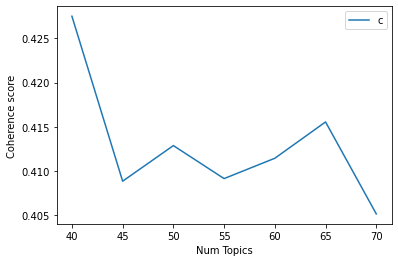

In [ ]:
# Show graph
plt.plot(range(40,71,5), coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Hyperparameters Tuning

In [ ]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus_tfidf,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           workers=2,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=bigram_words, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import tqdm

grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 35
max_topics = 51
step_size = 5
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus_tfidf)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
              #  gensim.utils.ClippedCorpus(corpus_tfidf, num_of_docs*0.75), 
               corpus_tfidf]
corpus_title = ['100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    graph = pd.read_csv('lda_tuning_results.csv')
    graph.head()
    pbar.close()

Streaming output truncated to the last 5000 lines.
2021-08-11 20:06:25,381: INFO : PROGRESS: pass 4, dispatched chunk #5 = documents up to #600/712, outstanding queue size 2
2021-08-11 20:06:25,658: INFO : PROGRESS: pass 4, dispatched chunk #6 = documents up to #700/712, outstanding queue size 2
2021-08-11 20:06:25,736: INFO : merging changes from 200 documents into a model of 712 documents
2021-08-11 20:06:25,802: INFO : topic #48 (0.020): 0.000*"surgery" + 0.000*"operation" + 0.000*"injury" + 0.000*"package" + 0.000*"young" + 0.000*"surgeon" + 0.000*"graphic" + 0.000*"mental" + 0.000*"jackie" + 0.000*"alliance"
2021-08-11 20:06:25,805: INFO : topic #0 (0.020): 0.000*"mental" + 0.000*"vaccination" + 0.000*"dame_sally" + 0.000*"andrew" + 0.000*"content" + 0.000*"restraint" + 0.000*"suicide" + 0.000*"online" + 0.000*"procedure" + 0.000*"prone"
2021-08-11 20:06:25,818: INFO : topic #34 (0.020): 0.000*"mosquito" + 0.000*"carer" + 0.000*"music" + 0.000*"venezuela" + 0.000*"drink" + 0.000*"

In [ ]:
cv = compute_coherence_values(corpus=corpus_tfidf, dictionary=dictionary, k=55, a=0.31, b=0.61)

2021-08-11 20:18:43,300: INFO : using serial LDA version on this node
2021-08-11 20:18:43,338: INFO : running online LDA training, 55 topics, 10 passes over the supplied corpus of 712 documents, updating every 200 documents, evaluating every ~712 documents, iterating 50x with a convergence threshold of 0.001000
2021-08-11 20:18:43,341: INFO : training LDA model using 2 processes
2021-08-11 20:18:43,512: INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #100/712, outstanding queue size 1
2021-08-11 20:18:43,827: INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #200/712, outstanding queue size 2
2021-08-11 20:18:44,228: INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #300/712, outstanding queue size 3
2021-08-11 20:18:44,391: INFO : merging changes from 200 documents into a model of 712 documents
2021-08-11 20:18:44,500: INFO : topic #43 (0.310): 0.001*"johnson" + 0.001*"stroke" + 0.000*"rise_speed" + 0.000*"gold" + 0.000*"compulsory_london" + 0.

In [ ]:
print(cv)

0.7080329142037525


## Optimal Model


In [ ]:
# optimal_model = model_list[4]
# model_topics = optimal_model.show_topics(formatted=False)
# pprint(optimal_model.print_topics(num_words=10))

In [ ]:
# pyLDAvis.gensim_models.prepare(optimal_model, corpus, dictionary)

In [ ]:
# # Compute Perplexity
# print('\nPerplexity: ', optimal_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# # Compute Coherence Score
# coherence_model_ldatfidf = CoherenceModel(model=optimal_model, texts=lemmatized_list, dictionary=dictionary, coherence='c_v')
# coherence_ldatfidf = coherence_model_ldatfidf.get_coherence()
# print('\nCoherence Score: ', coherence_ldatfidf)


## -----------------------Rewrite 




# Dominant topic in each sentence 

In [ ]:
# def format_topics_sentences(ldamodel=lda_model_tfidf, corpus=corpus, texts=texts):
#     # Init output
#     sent_topics_df = pd.DataFrame()

#     # Get main topic in each document
#     for i, row in enumerate(ldamodel[corpus]):
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         # Get the Dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
#             if j == 0:  # => dominant topic
#                 wp = ldamodel.show_topic(topic_num)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#             else:
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

#     # Add original text to the end of the output
#     contents = pd.Series(texts)
#     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#     return(sent_topics_df)


# df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts)

# # Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# # Show
# df_dominant_topic.head(10)

# Find the most representative document for each topic

In [ ]:
# # Group top 5 sentences under each topic
# sent_topics_sorteddf= pd.DataFrame()

# sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

# for i, grp in sent_topics_outdf_grpd:
#     sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
#                                              grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
#                                             axis=0)

# # Reset Index    
# sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# # Format
# sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# # Show
# sent_topics_sorteddf.head()

## Topic distribution across documents

In [ ]:
# # Number of Documents for Each Topic
# topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# # Percentage of Documents for Each Topic
# topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# # Topic Number and Keywords
# topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# # Concatenate Column wise
# df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# # Change Column names
# df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# # Show
# df_dominant_topics


# Trigram 

In [ ]:
# trigram = gensim.models.Phrases(bigram[bigram_words], threshold=100) 
# trigram_2 = gensim.models.phrases.Phraser(trigram)
# trigram_words = [trigram_2[text] for text in bigram_words]

In [ ]:
# # Create Dictionary
# dictionary_trigram = Dictionary(trigram_words)
# dictionary_trigram.filter_extremes(no_below=5, no_above=0.7)

# # Create Corpus
# corpus_trigram = [dictionary_trigram.doc2bow(text) for text in trigram_words]
# print('Number of unique tokens: %d' % len(dictionary_trigram))
# print('Number of documents: %d' % len(corpus_trigram))

# # Term Document Frequency
# corpus_trigram = [dictionary_trigram.doc2bow(text) for text in trigram_words]

# # View
# print(corpus_trigram[:1])

In [ ]:
# [[(dictionary_trigram[id], freq) for id, freq in cp] for cp in corpus_trigram[:1]]

In [ ]:
# tfidf_trigram =  gensim.models.TfidfModel(corpus_trigram)
# corpus_tfidf_trigram = tfidf_trigram[corpus_trigram]
# for i in corpus_tfidf_trigram[0]:
#   print(i)

In [ ]:
# lda_model_trigram = gensim.models.LdaMulticore(corpus_tfidf_trigram, num_topics=40, id2word=dictionary_trigram, workers=2, passes=2, iterations = 100)

In [ ]:
# pprint(lda_model_trigram.print_topics())

In [ ]:
# # Compute Perplexity
# print('\nPerplexity: ', lda_model_trigram.log_perplexity(corpus_trigram))  # a measure of how good the model is. lower the better.

# # Compute Coherence Score
# coherence_model_lda_tri = CoherenceModel(model=lda_model_trigram, texts=trigram_words, dictionary=dictionary_trigram, coherence='c_v')
# coherence_lda_tri = coherence_model_lda_tri.get_coherence()
# print('\nCoherence Score: ', coherence_lda_tri)

In [ ]:
pyLDAvis.gensim_models.prepare(lda_model_trigram, corpus_trigram, dictionary_trigram)

## Find optimal number of topics 

In [ ]:
# coherence_values_trigram = []
# model_list_trigram= []
# for num_topics in range(2, 20, 2):
#     model_trigram = gensim.models.LdaMulticore(corpus_tfidf_trigram, num_topics=num_topics, id2word=dictionary_trigram, workers=2, passes=2, iterations = 100)
#     model_list_trigram.append(model_trigram)
#     coherencemodel_trigram = CoherenceModel(model=model_trigram, texts=lemmatized_list, dictionary=dictionary_trigram, coherence='c_v')
#     coherence_values_trigram.append(coherencemodel_trigram.get_coherence())

In [ ]:
# Print the coherence scores
# for m, cv in zip(range(2,20,2), coherence_values_trigram):
#     print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [ ]:
# Show graph
# plt.plot(range(2,20,2), coherence_values_trigram)
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
# plt.show()